In [3]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [ ]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'review.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [2]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'business.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [ ]:
df.describe()

In [5]:
len(df[(df['stars'] == 1) | (df['stars'] == 2) | (df['stars'] == 3)])

2283833

In [6]:
len(df[(df['stars'] == 4) | (df['stars'] == 5)])

4402067

In [7]:
2283833/(4402067+2283833)

0.3415894643952198

In [9]:
import seaborn as sns

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


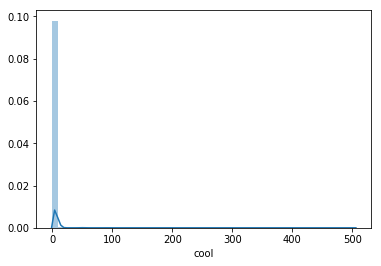

In [10]:
sns.distplot(df['cool'])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


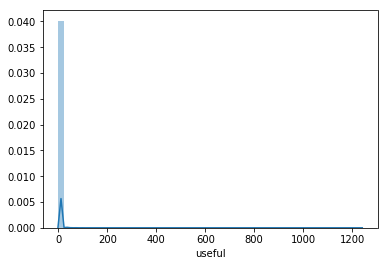

In [11]:
sns.distplot(df['useful'])

In [2]:
from collections import Counter
import gensim
import os
import re
import string

import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [4]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [5]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

In [6]:
STOPWORDS = set(STOPWORDS)

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [10]:
df['tokens'] = df['text'].apply(lambda x: tokenize(x))

In [9]:
df['tokens'].head()

0    [total, horrible, service, gs, crooks, actuall...
1    [adore, travis, hard, rock, new, kelly, carden...
2    [office, organized, friendly, dr, phillipp, gr...
3    [went, lunch, steak, sandwich, delicious, caes...
4    [today, second, sessions, paid, session, went,...
Name: tokens, dtype: object

In [19]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(df['tokens'])

NameError: name 'count' is not defined

In [21]:
wc_bad = count(df[df['stars'] <= 3]['tokens'])

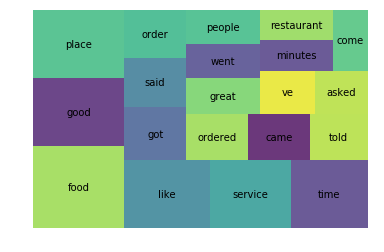

In [22]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [23]:
wc_good = count(df[df['stars'] >= 4]['tokens'])

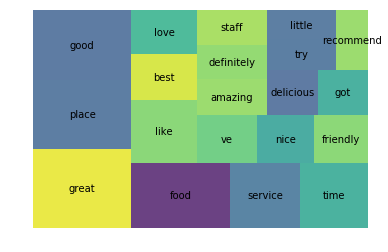

In [24]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [11]:
import seaborn as sns

In [ ]:
df.groupby('business_id').agg('count')

In [13]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [17]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
df['date'].sort_values()

In [11]:
file_name = "reviews_tokens.csv" 
df.to_csv(file_name)

In [12]:
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_tokens')

In [40]:
word_list = df['tokens'][0]

In [41]:
word_list = ','.join(word_list)

In [42]:
word_list

'total,horrible,service,gs,crooks,actually,nerve,charge,pills,checked,online,pills,cents,avoid,hospital,ers,costs'

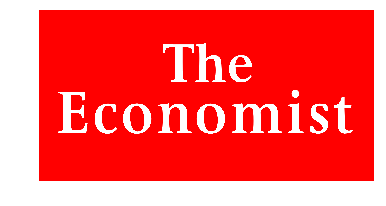

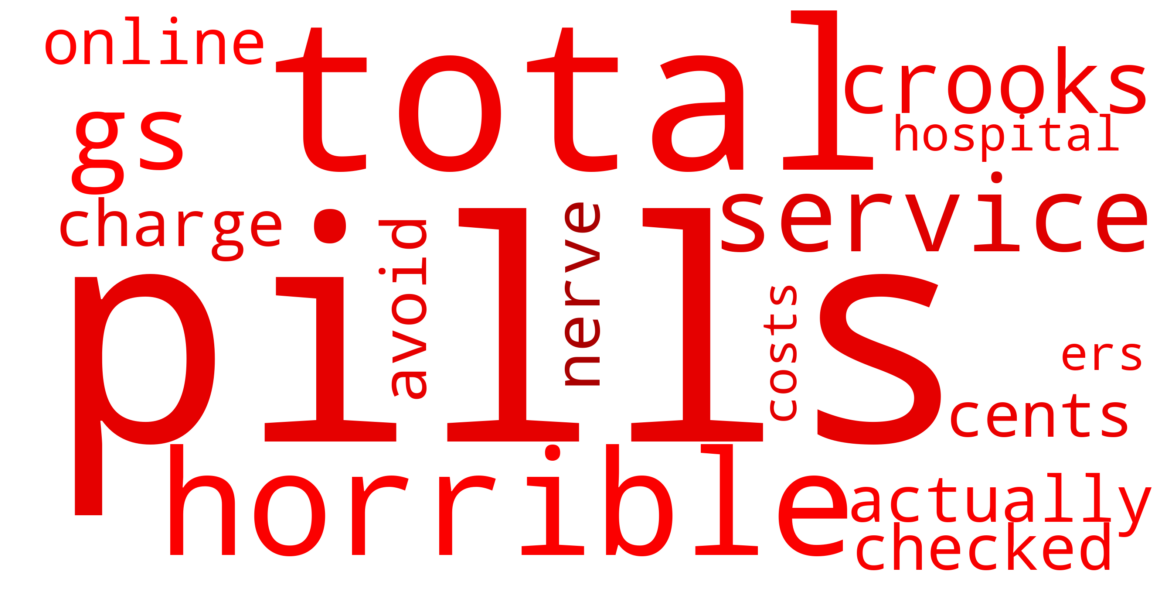

In [44]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------

#setting mask image
mask = np.array(Image.open('mask.png'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(word_list)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [8]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'reviews_tokens'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_csv(data_location)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks..."
1,1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0.0,yXQM5uF2jS6es16SJzNHfg,"['adore', 'travis', 'hard', 'rock', 'new', 'ke..."
2,2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3.0,n6-Gk65cPZL6Uz8qRm3NYw,"['office', 'organized', 'friendly', 'dr', 'phi..."
3,3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0.0,dacAIZ6fTM6mqwW5uxkskg,"['went', 'lunch', 'steak', 'sandwich', 'delici..."
4,4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ,"['today', 'second', 'sessions', 'paid', 'sessi..."


In [10]:
df = df.drop(columns='Unnamed: 0')

In [11]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks..."
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0.0,yXQM5uF2jS6es16SJzNHfg,"['adore', 'travis', 'hard', 'rock', 'new', 'ke..."
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3.0,n6-Gk65cPZL6Uz8qRm3NYw,"['office', 'organized', 'friendly', 'dr', 'phi..."
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0.0,dacAIZ6fTM6mqwW5uxkskg,"['went', 'lunch', 'steak', 'sandwich', 'delici..."
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ,"['today', 'second', 'sessions', 'paid', 'sessi..."


In [12]:
bucket='ds6-yelp-reviews'
data_key2 = 'business.json'
data_location2 = 's3://{}/{}'.format(bucket, data_key2)

business = pd.read_json(data_location2, lines=True)

In [13]:
df.shape, business.shape

((6685902, 10), (192609, 14))

In [14]:
df2 = df.merge(business, on='business_id')

In [15]:
df2.shape

(6685900, 23)

In [18]:
pd.set_option('display.max_columns', None)

In [27]:
import numpy as np
df2[df2['tokens'].isnull()]

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,tokens,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state
3315735,eO0Dsp8MBjUT16lno8gkmA,0,2017-02-22 01:24:23,0.0,OSdqcxyXqM-XTEgajJNUmw,5.0,Working with Tina and Marcia has been such a p...,NaN,NaN,NaN,"2831 St Rose Pkwy, Ste 100","{'ByAppointmentOnly': 'False', 'BusinessAccept...","Home Services, Real Estate Services, Real Esta...",Henderson,"{'Monday': '9:0-18:30', 'Tuesday': '9:0-18:30'...",1,36.008429,-115.111187,Tina & Marcia - Realty One Group,89052,5,5.0,NV
3433139,uWECX6-Uq9n8v5ipk9R29A,1,2014-06-10 22:31:23,0.0,lyNSICzFzDPHXL_E6PHvWw,5.0,Best Creole/Cajun food in Nevada! Order the B...,NaN,NaN,NaN,"241 W Charleston Blvd, Ste 101","{'RestaurantsPriceRange2': '2', 'Caters': 'Fal...","Breakfast & Brunch, Restaurants, Cajun/Creole",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1,36.158337,-115.158021,Lola's A Louisana Kitchen,89102,1056,4.0,NV


In [29]:
df2['text'].iloc[3315735]

'Working with Tina and Marcia has been such a pleasure!'

In [41]:
df2['tokens'].iloc[3315735] = tokenize(df2['text'].iloc[3315735])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
df2['tokens'].iloc[3433139] = tokenize(df2['text'].iloc[3433139])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
df2.isnull().sum()

business_id          0
cool                 0
date                 0
funny                0
review_id            0
stars_x              0
text                 2
useful               2
user_id              2
tokens               0
address              0
attributes      258297
categories        2137
city                 0
hours           534666
is_open              0
latitude             0
longitude            0
name                 0
postal_code          0
review_count         0
stars_y              0
state                0
dtype: int64

In [47]:
df2.head()

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,tokens,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV


In [60]:
df2['date'].values[0]

'2013-05-07 04:34:36'

In [63]:
df2['date'] = pd.to_datetime(df2['date'])

In [67]:
df2['date_only'] = df2['date'].dt.date

In [70]:
df2.head()

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,tokens,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state,date_only
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2014-10-11


In [72]:
df2 = df2.rename(columns={"stars_x": "star_review", "stars_y": "star_average", "date": "date_time", "date_only": "date"})

In [73]:
df2.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,star_average,state,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",3100 N Tenaya Way,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV,2014-10-11


In [74]:
file_name = "reviews_cleaned.csv" 
df2.to_csv(file_name)

In [75]:
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_cleaned.csv')

In [ ]:
bucket='ds6-yelp-reviews'
data_key3 = 'reviews_cleaned.csv'
data_location3 = 's3://{}/{}'.format(bucket, data_key3)

clean_df = pd.read_csv(data_location3)

In [4]:
clean_df.columns

Index(['Unnamed: 0', 'business_id', 'cool', 'date_time', 'funny', 'review_id',
       'star_review', 'text', 'useful', 'user_id', 'tokens', 'address',
       'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'star_average',
       'state', 'date'],
      dtype='object')

In [5]:
clean_df = clean_df.drop(columns=['Unnamed: 0', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'star_average', 'state'])

In [9]:
clean_df.dtypes

business_id     object
cool             int64
date_time       object
funny          float64
review_id       object
star_review    float64
text            object
useful         float64
user_id         object
tokens          object
date            object
dtype: object

In [12]:
clean_df.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11


In [11]:
clean_df['funny'].describe()

count    6.685900e+06
mean     4.827667e-01
std      2.378646e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.290000e+03
Name: funny, dtype: float64

In [26]:
import ast
clean_df['tokens'] = clean_df['tokens'].apply(ast.literal_eval)

In [37]:
from collections import Counter
def create_dict(text):
    return dict(Counter(text))

In [38]:
clean_df['token_dict'] = clean_df['tokens'].apply(lambda x: create_dict(x))

In [44]:
clean_df.tail()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date,token_dict
6685895,j3jkcLImva-T4ScqF1jvvg,0,2017-04-11 20:47:34,0.0,YRaje7-mwZlgGt8ryKf0rw,1.0,had an appointment at 3pm. At UPMC Presbyteria...,1.0,zwSNmaPL_BgZzUyffOuLVg,"[appointment, pm, upmc, presbyterian, arrived,...",2017-04-11,"{'appointment': 1, 'pm': 6, 'upmc': 1, 'presby..."
6685896,j3jkcLImva-T4ScqF1jvvg,0,2016-01-12 21:09:37,0.0,k_F6M2Fo3fUwx2CIPvVA5Q,3.0,UPMC is great to get medical care at but if yo...,0.0,DKtyJgHCwodrEf0oqJ8u4w,"[upmc, great, medical, care, applying, beware,...",2016-01-12,"{'upmc': 1, 'great': 1, 'medical': 1, 'care': ..."
6685897,vK6rLsSr6ft87S8C_Pvv2Q,0,2016-07-21 21:17:00,0.0,J6yKfAKTWwea2JbzL90jLQ,1.0,This job agency is very unprofessional. I deal...,2.0,FV77IEBStjIa_RL-AtLecA,"[job, agency, unprofessional, dealt, mainly, e...",2016-07-21,"{'job': 1, 'agency': 2, 'unprofessional': 1, '..."
6685898,vK6rLsSr6ft87S8C_Pvv2Q,0,2018-10-01 17:23:10,0.0,qByVVhoG6p_LhPAwnyZo0w,2.0,A mixed bag for those looking for short-term e...,1.0,WhVnaHLcTVj3Vg8bw0wssA,"[mixed, bag, looking, short, term, employment,...",2018-10-01,"{'mixed': 1, 'bag': 1, 'looking': 1, 'short': ..."
6685899,vK6rLsSr6ft87S8C_Pvv2Q,0,2014-08-20 16:34:15,0.0,2s3mrO7bgGjG01gmhqdDzA,2.0,No response from most staff members. You fill...,4.0,_fGju43E8HBbNbvRwT0JfQ,"[response, staff, members, information, online...",2014-08-20,"{'response': 1, 'staff': 2, 'members': 1, 'inf..."


In [45]:
file_name = "reviews_final.csv" 
clean_df.to_csv(file_name)

In [46]:
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_final.csv')

In [2]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key4 = 'reviews_final.csv'
data_location4 = 's3://{}/{}'.format(bucket, data_key4)

df = pd.read_csv(data_location4)

In [3]:
df.head()

,Unnamed: 0,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date,token_dict
0,0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07,"{'total': 1, 'horrible': 1, 'service': 1, 'gs'..."
1,1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09,"{'family': 1, 'er': 5, 'times': 1, 'past': 2, ..."
2,2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14,"{'disappointed': 1, 'care': 3, 'provided': 1, ..."
3,3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08,"{'went': 1, 'broken': 4, 'finger': 8, 'asked':..."
4,4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11,"{'mother': 2, 'mountain': 1, 'view': 1, 'nearl..."


In [4]:
df = df.drop(columns=['Unnamed: 0', 'token_dict'])

In [11]:
import datetime as datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.dtypes

business_id            object
cool                    int64
date_time      datetime64[ns]
funny                 float64
review_id              object
star_review           float64
text                   object
useful                float64
user_id                object
tokens                 object
date           datetime64[ns]
dtype: object

In [20]:
df['funny'].describe()

count    6.685900e+06
mean     4.827667e-01
std      2.378646e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.290000e+03
Name: funny, dtype: float64

In [21]:
file_name = "reviews_final2.csv" 
df.to_csv(file_name, index=False, encoding='utf-8')

In [23]:
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_final2.csv')

In [3]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key5 = 'reviews_final2.csv'
data_location5 = 's3://{}/{}'.format(bucket, data_key5)

df2 = pd.read_csv(data_location5)

In [4]:
df2.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11


In [5]:
df2['date'] = pd.to_datetime(df2['date'])

In [153]:
df2['date'] = pd.to_datetime(df2['date'])

str

In [206]:
df2['star_review'].dtype

dtype('float64')

In [158]:
import ast
business_id = 'ujmEBvifdJM6h6RLv4wQIg'
filtered = df2[df2['business_id'] == business_id].sort_values('date')
filtered['tokens'] = filtered['tokens'].apply(ast.literal_eval)
no_reviews = len(filtered)
x = no_reviews//10

In [4]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key6 = 'reviews_polarity.csv'
data_location6 = 's3://{}/{}'.format(bucket, data_key6)

df3 = pd.read_csv(data_location6)

In [4]:
df3.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date,polarity
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07,-0.333333
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09,-0.007778
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14,-0.138333
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08,-0.079384
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11,0.342667


In [5]:
import datetime as datetime
df3['date_time'] = pd.to_datetime(df3['date_time'])

In [6]:
df3['date'] = pd.to_datetime(df3['date'])

In [8]:
import ast
df3['tokens'] = df3['tokens'].apply(ast.literal_eval)

In [ ]:
def count(docs):

        word_counts = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')

        return wc

In [ ]:
def timeseries(bus_id):

    result = reviews.query.filter_by(business_id=bus_id)
    df = pd.read_sql(sql = result.statement, con = DB.engine)
    filtered = df.sort_values('date')
    no_reviews = len(filtered)
    filtered['tokens'] = filtered['tokens'].apply(ast.literal_eval)
    x = no_reviews//10
    output = {}
    dictionaries = []
    def listoflists(lst):
        return [[el] for el in lst]
    if no_reviews >= 20:
        agg_tokens = np.add.reduceat(filtered['tokens'].values, \
                                     np.arange(0, len(filtered['tokens']), x))
        nth = filtered.iloc[::x, :]
        date = nth['date'].values
        avg_stars = np.add.reduceat(filtered['star_review'].values, \
                    np.arange(0, len(filtered['star_review']), x))/ \
                    np.bincount(np.resize(np.repeat(np.arange(0,(len(filtered['star_review'])//x)+1), x), \
                    len(filtered['star_review'])))
        new_df = pd.DataFrame({'tokens':agg_tokens, 'date':date, 'avg_stars': avg_stars})
    else:
        agg_tokens = filtered['tokens'].values
        date = filtered['date'].values
        avg_stars = filtered['star_review'].values
        new_df = pd.DataFrame({'tokens':agg_tokens, 'date':date, 'avg_stars': avg_stars})
    for i, ddate in enumerate(new_df['date']):
        if len(set(new_df['tokens'].values[i])) < 30:
            for j in range(len(set(new_df['tokens'].values[i]))):
                extract = listoflists(new_df['tokens'].values[i])
                wc = count(extract)
                wc_final = wc[wc['rank'] <= 30]
                row_dict = dict({"word": str(wc_final['word'].values[j]), \
                                 "count": str(wc_final['count'].values[j]), \
                                 "rank": str(wc_final['rank'].values[j]), \
                                 "avg_stars": str(new_df['avg_stars'].values[i]), \
                                 "pct_total": str(wc_final['pct_total'].values[j])})
                dictionaries.append(row_dict)
        else:
            for j in range(30):
                extract = listoflists(new_df['tokens'].values[i])
                wc = count(extract)
                wc_final = wc[wc['rank'] <= 30]
                row_dict = dict({"word": str(wc_final['word'].values[j]), \
                                 "count": str(wc_final['count'].values[j]), \
                                 "rank": str(wc_final['rank'].values[j]), \
                                 "avg_stars": str(new_df['avg_stars'].values[i]), \
                                 "pct_total": str(wc_final['pct_total'].values[j])})
                dictionaries.append(row_dict)
        review_date = dict({str(ddate): dictionaries})
        output.update(review_date)
        dictionaries = []
    return output

In [11]:
df3.groupby(['business_id'])['business_id'].count().sort_values(ascending=False)

business_id
4JNXUYY8wbaaDmk3BPzlWw    8570
RESDUcs7fIiihp38-d6_6g    8568
K7lWdNUhCbcnEvI0NhGewg    6887
f4x1YBxkLrZg652xt2KR5g    5847
cYwJA2A6I12KNkm2rtXd5g    5575
DkYS3arLOhA8si5uUEmHOw    5206
2weQS-RnoOBhb1KsHKyoSQ    4534
5LNZ67Yw9RD6nf4_UhXOjw    4522
iCQpiavjjPzJ5_3gPD5Ebg    4351
SMPbvZLSMMb7KU76YNYMGg    4350
ujHiaprwCQ5ewziu0Vi9rw    4318
AV6weBrZFFBfRGCbcRGO4g    4240
KskYqH1Bi7Z_61pH6Om8pg    4131
El4FC8jcawUVgw_0EIcbaQ    4093
rcaPajgKOJC2vo_l3xa42A    4014
eoHdUeQDNgQ6WYEnP2aiRw    4006
FaHADZARwnY4yvlvpnsfGA    3710
faPVqws-x-5k2CQKDNtHxw    3662
OETh78qcgDltvHULowwhJg    3642
Wxxvi3LZbHNIDwJ-ZimtnA    3579
u_vPjx925UPEG9DFOAAvFQ    3575
hihud--QRriCYZw1zZvW4g    3554
7sPNbCx7vGAaH7SbNPZ6oA    3494
g8OnV26ywJlZpezdBnOWUQ    3366
3kdSl5mo9dWC4clrQjEDGg    3350
XZbuPXdyA0ZtTu3AzqtQhg    3339
XXW_OFaYQkkGOGniujZFHg    3330
YJ8ljUhLsz6CtT_2ORNFmg    3305
na4Th5DrNauOv-c43QQFvA    3301
HhVmDybpU7L50Kb5A0jXTg    3284
                          ... 
rUyfJSt7aiuh5S_lQngH5Q     

In [5]:
my_list = df3['business_id'].unique().tolist()

with open('your_file.txt', 'w') as f:
    for item in my_list:
        f.write("%s\n" % item)

In [19]:
vc = df3['business_id'].value_counts() >= 10
vc = vc[vc]

df4 = df3.loc[df3['business_id'].isin(vc.index)]

In [21]:
new_ids = df4['business_id'].unique().tolist()

with open('newids.txt', 'w') as f:
    for item in new_ids:
        f.write("%s\n" % item)

In [23]:
df4[df4['business_id'] == 'vYu1_HnKIcj6_rhw3p4qYw']

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
133772,vYu1_HnKIcj6_rhw3p4qYw,0,2015-10-17 00:43:00,1.0,TXlGGbO7lnb2GLJhXneEow,1.0,Worst Starbucks EVER!!!! The wait time is alwa...,1.0,uFJ5xKwtHSQsqBU0MBKx9g,"['worst', 'starbucks', 'wait', 'time', 'crazy'...",2015-10-17
133773,vYu1_HnKIcj6_rhw3p4qYw,0,2018-09-26 17:45:48,0.0,iaqNlKNcnd6agTHlCaaY7A,2.0,They're slow as hell and rude. Which I don't u...,0.0,LzbRjHXyYDPiTyOWHP6DHg,"['slow', 'hell', 'rude', 'understand', 'barist...",2018-09-26
133774,vYu1_HnKIcj6_rhw3p4qYw,0,2016-03-07 10:12:11,3.0,Lw3lIb40CaHtKfF62sra8Q,1.0,Slow. Slow slow slow. Oh did I mention how slo...,1.0,wxQCLMnuVYbdtmQCc2ryZg,"['slow', 'slow', 'slow', 'slow', 'oh', 'mentio...",2016-03-07
133775,vYu1_HnKIcj6_rhw3p4qYw,0,2014-03-15 21:14:28,0.0,UyS0_xYrww5ffa8AZiOUHg,3.0,This Starbucks is often understaffed and it's ...,0.0,eGPj3pg6r5r8wYhq1dOs7A,"['starbucks', 'understaffed', 'terrible', 'emp...",2014-03-15
133776,vYu1_HnKIcj6_rhw3p4qYw,0,2013-04-13 21:15:18,0.0,otGqZAS-U8JtGWg5WxrVAQ,3.0,Its Starbucks. Inside the Casino. Coffee was y...,0.0,FNYZr60b6aOL2YjhXcEerg,"['starbucks', 'inside', 'casino', 'coffee', 'y...",2013-04-13
133777,vYu1_HnKIcj6_rhw3p4qYw,1,2013-10-11 23:51:51,1.0,GcXPOiYXm0PTev5d5a2ezw,4.0,"As good as a real Starbucks. Good service, goo...",1.0,Anuuo7l9KgAsSvnOHXcE1g,"['good', 'real', 'starbucks', 'good', 'service...",2013-10-11
133778,vYu1_HnKIcj6_rhw3p4qYw,0,2013-01-13 18:39:26,0.0,OwiU_XG4-k9jAb5HXzx5Lg,4.0,This is one of my favorite locations in town. ...,0.0,1dM27ursYQBTH2NR2ggtSw,"['favorite', 'locations', 'town', 'faster', 't...",2013-01-13
133779,vYu1_HnKIcj6_rhw3p4qYw,1,2016-04-27 22:41:19,1.0,Asc80642mxDyoAFuJRr0qg,5.0,This Starbucks is very convenient being inside...,3.0,7nA9P6EukhTwZi67JB-UTg,"['starbucks', 'convenient', 'inside', 'target'...",2016-04-27
133780,vYu1_HnKIcj6_rhw3p4qYw,3,2013-09-16 23:14:49,2.0,ClyKuYqr9GGxukO7Ai13iw,5.0,Salted caramel mocha frapp...... Heaven.\n\nTh...,3.0,bhmJrMRVc2sbk8XP00ravw,"['salted', 'caramel', 'mocha', 'frapp', 'heave...",2013-09-16
133781,vYu1_HnKIcj6_rhw3p4qYw,0,2017-02-24 20:20:55,0.0,dsbllrEeBlIibvAGwzzzEQ,1.0,Came here at noon for a strawberry acai refres...,0.0,lYB5tmlBuKfVQSASzyvMeg,"['came', 'noon', 'strawberry', 'acai', 'refres...",2017-02-24


In [4]:
df3.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11


In [4]:
review_dist1 = df3.groupby(['business_id', 'star_review']).agg({'star_review': 'count'}).unstack()

In [6]:
review_dist1.columns

MultiIndex(levels=[['star_review'], [1.0, 2.0, 3.0, 4.0, 5.0]],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'star_review'])

In [7]:
review_dist1.columns = review_dist1.columns.map(lambda x: ''.join([*map(str, x)]))

In [10]:
review_dist1 = review_dist1.fillna(0)

In [17]:
df3['date_time'].describe()

count                 6685900
unique                6552820
top       2014-07-28 05:36:33
freq                        7
Name: date_time, dtype: object

In [20]:
df3['date_time'] = pd.to_datetime(df3['date_time'])

In [26]:
df3.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11


In [52]:
reviewbyyear = df3.groupby(['business_id', df3['date_time'].dt.year.rename('year')]).agg({'business_id': 'count'}).unstack()

In [54]:
reviewbyyear.columns

MultiIndex(levels=[['business_id'], [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           names=[None, 'year'])

In [55]:
reviewbyyear.columns = reviewbyyear.columns.map(lambda x: ''.join([*map(str, x)]))

In [59]:
reviewbyyear = reviewbyyear.fillna(0)

In [60]:
reviewbyyear.head()

,business_id2004,business_id2005,business_id2006,business_id2007,business_id2008,business_id2009,business_id2010,business_id2011,business_id2012,business_id2013,business_id2014,business_id2015,business_id2016,business_id2017,business_id2018
business_id,,,,,,,,,,,,,,,
--1UhMGODdWsrMastO9DZw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0
--6MefnULPED_I942VcFNA,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,2.0,3.0,9.0,4.0,13.0,8.0
--7zmmkVg-IMGaXbuVd0SQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,14.0,18.0,11.0
--8LPVSo5i0Oo61X01sV9A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
--9QQLMTbFzLJ_oT-ON3Xw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,5.0,2.0,2.0


In [61]:
reviewbyyear.tail()

,business_id2004,business_id2005,business_id2006,business_id2007,business_id2008,business_id2009,business_id2010,business_id2011,business_id2012,business_id2013,business_id2014,business_id2015,business_id2016,business_id2017,business_id2018
business_id,,,,,,,,,,,,,,,
zzvlwkcNR1CCqOPXwuvz2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
zzwaS0xn1MVEPEf0hNLjew,0.0,0.0,0.0,1.0,2.0,4.0,7.0,6.0,1.0,6.0,4.0,11.0,10.0,15.0,5.0
zzwhN7x37nyjP0ZM8oiHmw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,13.0,21.0
zzwicjPC9g246MK2M1ZFBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,10.0,16.0,11.0,8.0,19.0
zzzaIBwimxVej4tY6qFOUQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,11.0,0.0,0.0,0.0,0.0


In [6]:
df3.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11


In [8]:
from textblob import TextBlob

TextBlob("not a very great calculation").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

In [18]:
TextBlob("flavorful chicken").sentiment

Sentiment(polarity=-0.6, subjectivity=0.95)

In [33]:
df3 = df3.dropna()

In [9]:
df3.isnull().sum()

business_id    0
cool           0
date_time      0
funny          0
review_id      0
star_review    0
text           0
useful         0
user_id        0
tokens         0
date           0
polarity       0
dtype: int64

In [ ]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

df3['polarity'] = df3['text'].apply(lambda x: detect_polarity(x))

In [48]:
file_name = "reviews_polarity.csv" 
df3.to_csv(file_name, index=False, encoding='utf-8')
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_polarity.csv')

In [5]:
# from collections import Counter
# STOPWORDS = set(STOPWORDS)
# from spacy.lang.en.stop_words import STOP_WORDS

# def get_nouns(text):
#     doc = nlp(text)
#     nouns = []
#     for chunk in doc.noun_chunks:
#         final_list = [word for word in chunk.text if word not in STOPWORDS]
#         final_string = ' '.join(final_list)
#             if len(chunk) > 1:
#                 nouns.append(chunk.text)
#     word_freq = Counter(nouns)
#     common_nouns = word_freq.most_common(10)
#     return nouns

def get_nouns2(text):
    doc = nlp(text)
    nouns = []
    for chunk in doc.noun_chunks:
        nouns.append(chunk.text)
    return nouns

def get_nouns(text):
    doc = nlp(text)
    tags=['NOUN', 'ADJ']
    nouns = []
    for chunk in doc.noun_chunks:
        clean = [token for token in chunk if token.pos_ in tags]
        filtered = ' '.join(str(v).lower() for v in clean)
        if len(filtered.split()) > 1:
            nouns.append(filtered)
    return nouns

In [21]:
t = df3.iloc[53445].values[6]

In [22]:
get_nouns(t)

['good piece',
 'chicken skin',
 'great qualities',
 'other tables',
 'good food',
 'great chicken',
 'great tasting chicken',
 'small pieces',
 'good quality chicken',
 'final thoughts']

In [37]:
type(df3)

pandas.core.frame.DataFrame

In [3]:
import dask.dataframe as dd

role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key6 = 'reviews_polarity.csv'
data_location6 = 's3://{}/{}'.format(bucket, data_key6)

df7 = dd.read_csv(data_location6)

In [22]:
import dask.dataframe as dd
import multiprocessing

In [40]:
df3.isnull().sum()

business_id    0
cool           0
date_time      0
funny          0
review_id      0
star_review    0
text           0
useful         0
user_id        0
tokens         0
date           0
polarity       0
dtype: int64

In [23]:
ddnew = dd.from_pandas(df3, npartitions=4*multiprocessing.cpu_count())

In [80]:
type(df3['tokens'].values[0])

str

In [24]:
def get_nouns3(x):
    text = x['text']
    doc = nlp2(text)
    tags=['NOUN', 'ADJ']
    nouns = []
    for chunk in doc.noun_chunks:
        clean = [token for token in chunk if token.pos_ in tags]
        filtered = ' '.join(str(v).lower() for v in clean)
        if len(filtered.split()) > 1:
            nouns.append(filtered)
    return nouns

In [38]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    ddnew['noun_chunks'] = ddnew['text'].loc[1:1000].apply(lambda x: get_nounst(x), meta=pd.Series(dtype='str')).compute()

[########################################] | 100% Completed | 18.9s


In [40]:
ddnew['noun_chunks']

Dask Series Structure:
npartitions=258
0          object
1             ...
            ...  
6659835       ...
6685895       ...
Name: noun_chunks, dtype: object
Dask Name: getitem, 1805 tasks

In [34]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    test = ddnew.loc[1:1000].map_partitions(lambda df: df.apply((lambda row: get_nouns3(row)), axis=1)).compute()

[########################################] | 100% Completed | 20.6s


In [ ]:
df3['noun_chunks'] = df3['text'].swifter.progress_bar(enable=True).apply(lambda row: get_nounst(row), axis=1)

In [ ]:
df7['noun_chunks'] = df7['text'].apply(lambda x: get_nouns(x)).compute()

# dd.from_pandas(df6['text'],npartitions=4).\
#    map_partitions(
#       lambda df : df.apply(
#          lambda x : get_nouns(x),axis=1)).\
#    compute(get=get)

In [9]:
nlp3 = spacy.load("en_core_web_md", disable=["tokenizer", "ner", "textcat"])
nlp2 = spacy.load("en_core_web_md", disable=["tokenizer", "ner", "textcat"])
# nlp2.add_pipe(get_nounst, name="get_nouns", last=True)

In [6]:
def get_nounst(doc):
    tags=['NOUN', 'ADJ']
    nouns = []
    for chunk in doc.noun_chunks:
        clean = [token for token in chunk if token.pos_ in tags]
        filtered = ' '.join(str(v).lower() for v in clean)
        if len(filtered.split()) > 1:
            nouns.append(filtered)
    return nouns

In [35]:
%timeit test2 = df3['text'].iloc[0:1200].apply(lambda x: get_nounst(x))

24.9 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit nlp2(w[0].text)

22.6 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
docs = df3['text'].iloc[0:5000].values

results = nlp2.pipe(docs, n_threads=16, batch_size=1000)

In [19]:
docs = df3['text'].values

def testingpipe():
    results = []
    for doc in nlp3.pipe(docs, n_threads=-1, batch_size=100000):
        results.append(get_nounst(doc))
    return results

In [ ]:
testfinal = testingpipe()

In [25]:
df3['noun_chunks'] = testfinal

In [30]:
file_name = "reviews_chunks.csv" 
df3.to_csv(file_name, index=False, encoding='utf-8')
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_chunks.csv')

In [5]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key7 = 'reviews_chunks.csv'
data_location7 = 's3://{}/{}'.format(bucket, data_key7)

df4 = pd.read_csv(data_location7)

In [11]:
bucket='ds6-yelp-reviews'
data_key = 'business.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [5]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [6]:
df4.shape, df.shape

((6685896, 13), (192609, 14))

In [5]:
dfall = df4.merge(df, on='business_id')

In [13]:
dfall.shape

(6685896, 26)

In [14]:
dfall.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,...,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",...,Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",...,Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",...,Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",...,Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",...,Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,238,2.5,NV


In [17]:
dfall.isnull().sum()

business_id     0
cool            0
date_time       0
funny           0
review_id       0
star_review     0
text            0
useful          0
user_id         0
tokens          0
date            0
polarity        0
noun_chunks     0
address         0
attributes      0
categories      0
city            0
hours           0
is_open         0
latitude        0
longitude       0
name            0
postal_code     0
review_count    0
stars           0
state           0
dtype: int64

In [6]:
dfall = dfall.fillna(0)

In [22]:
dfall2 = dfall.drop_duplicates(['user_id', 'name'])

In [22]:
dfall.shape, dfall2.shape

((6685896, 26), (6395577, 26))

In [24]:
dfall2.isnull().sum()

business_id     0
cool            0
date_time       0
funny           0
review_id       0
star_review     0
text            0
useful          0
user_id         0
tokens          0
date            0
polarity        0
noun_chunks     0
address         0
attributes      0
categories      0
city            0
hours           0
is_open         0
latitude        0
longitude       0
name            0
postal_code     0
review_count    0
stars           0
state           0
dtype: int64

In [ ]:
file_name = "reviews_business.csv" 
dfall2.to_csv(file_name, index=False, encoding='utf-8')
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'reviews_business.csv')

In [4]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key8 = 'reviews_business.csv'
data_location8 = 's3://{}/{}'.format(bucket, data_key8)

df_tog = pd.read_csv(data_location8, encoding='utf-8')

In [7]:
df_tog = df_tog.drop(columns=['address', 'postal_code'])

In [6]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [15]:
def get_first(row):
    first = row.split(',')[0]
    return first

In [4]:
df2 = df2.dropna()

In [5]:
df2['categories'] = df2['categories'].apply(lambda x: get_first(x))

In [48]:
import category_encoders as ce
ordinal = ce.OrdinalEncoder(cols = ['categories', 'postal_code']).fit(df2)

In [12]:
import category_encoders as ce
ordinaltwo = ce.OrdinalEncoder(cols = ['postal_code']).fit(df2)

In [14]:
onehot = ce.OneHotEncoder(cols = ['categories']).fit(newnumericdata)

In [15]:
newnumericdata2 = onehot.transform(newnumericdata)

In [13]:
newnumericdata = ordinaltwo.transform(df2)

In [49]:
numericdata = ordinal.transform(df2)

In [ ]:
newnumericdata = onehot.transform(df2)

In [56]:
processed = numericdata[['business_id','is_open', 'latitude', 'longitude', 'review_count', 'stars', 'categories', 'postal_code']]

In [57]:
processed = processed.set_index('business_id')

In [17]:
processed2 = newnumericdata2.drop(columns=['address','attributes','city','hours','name','state'])

In [18]:
processed2 = processed2.set_index('business_id')

In [19]:
from scipy.sparse import *
from scipy import *
bus_matrix = csr_matrix(processed2.values)

In [20]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [21]:
knn_comp = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_comp.fit(bus_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [22]:
randomChoice = np.random.choice(processed2.shape[0])
distances, indices = knn_comp.kneighbors(processed2.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 11)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Competitors for Business {0}:\n'.format(processed2.index[randomChoice]))
    else:
        print('{0}: {1}'.format(i, processed2.index[indices.flatten()[i]]))

Competitors for Business 7EnzO970Zdrd_gjIJJLfrQ:

1: uFQRxuI7o217IO_Wqn9bFQ
2: BHTWG6p3FsnnlCGMotvuAQ
3: iKf__AXMeW1ZtCjD_z0jSw
4: xJvuz0J3rPdILToxLWhtIg
5: kGiUC1pim4R97rgql5c-3g
6: eKbN4KVQYgGt3flbYqfXzw
7: QLKGUH1V3mcWwbJ7_S0hOw
8: YaJIasKjOgswDpitdMD1mA
9: QouAo7lqUhPtW7qZpkNS8g
10: jI0_xQE1Kh4JJ-HtfXEwTw


## Criteria for composite index

1. Number of reviews (50%)
2. Avg. star rating (50%)

star_score = (stars/5) x 100

review_score = (review_count/max(review_count)) x 100

Final score = (star_score) x .50 + (review_score) x 0.50

In [77]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from scipy.sparse import *
import numpy as np
from scipy import *

def get_categories(df, bus_id):
    filter = df.loc[bus_id]
    categories = filter['categories'].split(",")
    cleans = [s.strip() for s in categories]
    numcommon = []
    
    for i in range(len(df)):
        if (df['categories'].iloc[i] != None and df['state'].iloc[i] == df['state'].loc[bus_id]):
            rows_text = df['categories'].iloc[i].split(",")
            rowsclean = [s.strip() for s in rows_text]
            incommon = set(cleans) & set(rowsclean)
            noitems = len(incommon)
            if noitems > 0:
                for j in range(noitems):
                    numcommon.append(df.index[i])
    
    mostcommon = [item for items, c in Counter(numcommon).most_common() for item in [items] * c]
    seen = set()
    finalist = [x for x in mostcommon if not (x in seen or seen.add(x))]
    final_df = df.loc[finalist]
    return final_df

# def get_competitors(bus_id):
#     data = get_categories(df_knnt, bus_id)
#     data['common_cat_rank'] = list(range(len(data),0,-1))
#     numinfo = data[['is_open', 'latitude', 'longitude', 'num_categories', 'review_count', 'stars', 'postal_code', 'common_cat_rank']]
#     numcomp = len(numinfo)
#     if numcomp < 11:
#         n_neighbors = numcomp
#     else:
#         n_neighbors = 11
#     bus_matrix = csr_matrix(numinfo.values)
#     knn_comp = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
#     knn_comp.fit(bus_matrix)
#     distances, indices = knn_comp.kneighbors(numinfo.loc[bus_id].values.reshape(1, -1), n_neighbors = n_neighbors)
#     competitors = [numinfo.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
#     return competitors

def get_competitors(df):
    competitorlist = []
    for i in range(len(df)):
        data = get_categories(df, df.index[i])
        data['common_cat_rank'] = list(range(len(data),0,-1))
        numinfo = data[['is_open', 'latitude', 'longitude', 'num_categories', 'review_count', 'stars', 'postal_code', 'common_cat_rank']]
        numcomp = len(numinfo)
        if numcomp < 11:
            n_neighbors = numcomp
        else:
            n_neighbors = 11
        bus_matrix = csr_matrix(numinfo.values)
        knn_comp = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
        knn_comp.fit(bus_matrix)
        distances, indices = knn_comp.kneighbors(numinfo.loc[df.index[i]].values.reshape(1, -1), n_neighbors = n_neighbors)
        competitors = [numinfo.index[indices.flatten()[j]] for j in range(1, len(distances.flatten()))]
        competitorlist.append(competitors)
    df['competitors'] = competitorlist
    return df

def get_index(df):
    for i in range(len(df)):
        if (pd.isnull(df['percentile'].iloc[i]) == True and df['categories'].iloc[i] != None):
            data = get_categories(df, df.index[i])
            final_scores = []
            for i in range(len(data)):   
                review_score = (data['review_count'].iloc[i]/data['review_count'].max())*100
                star_score = (data['stars'].iloc[i]/5)*100
                total_score = (star_score*.50) + (review_score*0.50)
                final_scores.append(total_score)
            if len(final_scores) > 1:
                data['score'] = final_scores
                sz = data['score'].size-1
                data['percentile'] = data['score'].rank(method='max').apply(lambda x: 100.0*(x-1)/sz)
    #             df = df.merge(data[['percentile', 'score']], left_index=True, right_on='percentile', how='left')
                data['best_sector'] = [data.nlargest(5, 'percentile').index.tolist()]*len(data)
                df.update(data)
            else:
                pass
        else:
            continue
    return df

In [459]:
numdata2['percentile'] = np.nan
numdata2['score'] = np.nan

In [460]:
numdata2['best_sector'] = np.nan

In [ ]:
numdata2.isnull().sum()

In [462]:
get_index(numdata2)

,address,attributes,num_categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,categories,percentile,score,best_sector
business_id,,,,,,,,,,,,,,,,,
1SWheh84yJXfytovILXOAQ,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1.0,Phoenix,None,0.0,33.522143,-112.018481,Arizona Biltmore Golf Club,1.0,5.0,3.0,AZ,"Golf, Active Life",10.271318,30.274123,"[1qwkbN3wu3AGDxMTXVz2gA, amNromvj2O7OAYYrlDEUc..."
QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",2.0,Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,2.0,128.0,2.5,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",18.817321,28.017445,"[r_BrIgzYcwo1NAuG9dLbpg, aLcFhMe6DDJ430zelCpd2..."
gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",3.0,Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0,35.092564,-80.859132,Musashi Japanese Restaurant,3.0,170.0,4.0,NC,"Sushi Bars, Restaurants, Japanese",85.156069,45.407125,"[RVQE2Z2uky4c0-njFQO66g, RAh9WCQAuocM7hYM5_6tn..."
xvX2CttrVhyG2z1dFg_0xw,"15655 W Roosevelt St, Ste 237",None,4.0,Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1.0,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,4.0,3.0,5.0,AZ,"Insurance, Financial Services",83.943662,50.434783,"[HME5y0qMKFRUbHZykncGNA, jikjjW1bN0swCMguFazcx..."
HhyxOkGAM07SRYtlQ4wMFQ,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",5.0,Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1.0,35.190012,-80.887223,Queen City Plumbing,5.0,4.0,4.0,NC,"Plumbing, Shopping, Local Services, Home Servi...",60.419065,40.549451,"[z2Yivr-C0K0H2sLNXvnZyg, 56HZLqQOcS1FSXqYG-3vL..."
68dUKd8_8liJ7in4aWOSEA,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",6.0,Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1.0,43.599475,-79.711584,The UPS Store,6.0,3.0,2.5,ON,"Shipping Centers, Couriers & Delivery Services...",32.092079,25.914634,"[3HVxkz03TS_ssJ7j3x5dRA, 3PekkCkOZD7Pe3Q4owP3P..."
5JucpCfHZltJh5r1JabjDg,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",7.0,Calgary,None,1.0,50.943646,-114.001828,Edgeworxx Studio,7.0,7.0,3.5,AB,"Beauty & Spas, Hair Salons",51.624549,40.555556,"[idvSppPUGVzTwyc8o9IxxQ, 9rTJBAstigetUTCm3gzeh..."
gbQN7vr_caG_A1ugSmGhWg,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",8.0,Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1.0,36.099872,-115.074574,Supercuts,8.0,3.0,3.5,NV,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",28.168275,35.034091,"[2weQS-RnoOBhb1KsHKyoSQ, Wxxvi3LZbHNIDwJ-Zimtn..."
Y6iyemLX_oylRpnr38vgMA,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",9.0,Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0.0,33.654815,-112.188568,Vita Bella Fine Day Spa,9.0,8.0,5.0,AZ,"Nail Salons, Beauty & Spas, Day Spas",85.403927,50.632911,"[thBWpIcP6vclsHS6GfI1dw, -sAr-LA9TsIdl37UjwBlv..."


In [ ]:
file_name = "ranking_business.csv" 
numdata2.to_csv(file_name, encoding='utf-8')
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ds6-yelp-reviews', 'ranking_business.csv')

In [6]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key9 = 'ranking_business.csv'
data_location9 = 's3://{}/{}'.format(bucket, data_key9)

df_ranking = pd.read_csv(data_location9, encoding='utf-8')

In [8]:
df_ranking.isnull().sum()

address            7682
attributes        28836
num_categories        0
city                  1
hours             44830
is_open               0
latitude              0
longitude             0
name                  0
postal_code           0
review_count          0
stars                 0
state                 0
categories          482
percentile          517
score               517
best_sector         517
dtype: int64

In [ ]:
get_index(numdata2, '1SWheh84yJXfytovILXOAQ').sort_values(by=['percentile'], ascending=False)

In [7]:
df_knn = df_ranking.copy()

In [8]:
df_knn['categories'] = df_knn['categories'].fillna('No Category')

In [ ]:
df_knn['categories'] = df_knn['categories'].apply(lambda x: get_first(x))

In [12]:
df_knn.columns

Index(['address', 'attributes', 'num_categories', 'city', 'hours', 'is_open',
       'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars',
       'state', 'categories', 'percentile', 'score', 'best_sector'],
      dtype='object')

In [13]:
categorieslist = df_knn['categories'].str.cat(sep =", ").split(", ")

In [14]:
categoriesdata = [[el] for el in categorieslist] 

In [15]:
catfreq = pd.DataFrame(categoriesdata, columns=['categories'])

In [16]:
catfreq = catfreq[['categories']]

In [17]:
catfreq = catfreq.drop_duplicates('categories')

In [18]:
catfreq['id'] = list(range(1, len(catfreq)+1, 1))

In [19]:
catfreq.head()

,categories,id
0,Golf,1
1,Active Life,2
2,Specialty Food,3
3,Restaurants,4
4,Dim Sum,5


In [9]:
mulcolumns = pd.concat([df_knn, df_knn['categories'].str.split(', ', expand=True)], axis=1)

In [12]:
mulcolumns = pd.concat([mulcolumns, df[['business_id']]], axis=1)

In [13]:
mulcolumns = mulcolumns.set_index('business_id')

In [ ]:
# for col in mulcolumns.iloc[:,17:23]:
#     mulcolumns[col] = mulcolumns[col].map(catfreq)
mulcolumns.iloc[:,17:23] = mulcolumns.iloc[:,17:23].replace(catfreq.set_index('categories')['id'])

In [24]:
mulcolumns.iloc[:,17:23] = mulcolumns.iloc[:,17:23].fillna(0)

In [26]:
mulcolumns = mulcolumns.drop(columns=list(range(6,37)))

In [28]:
dafr = mulcolumns.loc['gnKjwL_1w79qoiV3IC_xQQ'].to_frame().T

In [29]:
dafr = mulcolumns.loc['gnKjwL_1w79qoiV3IC_xQQ'].to_frame().T
for x in mulcolumns.columns:
    dafr[x]=dafr[x].astype(mulcolumns[x].dtypes.name)

In [30]:
import scipy
import numpy as np
from scipy import spatial
ary = scipy.spatial.distance.cdist(mulcolumns[['latitude','longitude','percentile',0,1,2,3,4,5]], dafr[['latitude','longitude','percentile',0,1,2,3,4,5]], metric='euclidean')

In [31]:
test_elements = np.sort(ary.flatten())[:10]

In [32]:
test_elements = np.sort(ary.flatten())[:10]
mask = np.isin(ary, test_elements)

In [33]:
mask

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [14]:
mulcolumns = mulcolumns.rename(columns={0: "category_1", 1: "category_2", 2: "category_3", 3: "category_4", 4: "category_5", 5: "category_6"})

In [15]:
mulcolumns.iloc[:,17:23] = mulcolumns.iloc[:,17:23].fillna("No category")

In [16]:
mulcolumns[mulcolumns.index == '1SWheh84yJXfytovILXOAQ'].iloc[:,17:23].values.flatten().tolist()

['Golf',
 'Active Life',
 'No category',
 'No category',
 'No category',
 'No category']

In [142]:
collist = mulcolumns[mulcolumns.index == '1SWheh84yJXfytovILXOAQ'].iloc[:,17:23].values.flatten().tolist()

In [144]:
collist = [x for x in collist if not x.startswith('No category')]

In [145]:
collist

['Golf', 'Active Life']

In [159]:
mask = mulcolumns.iloc[:,17:23].isin(collist)

In [235]:
mask['no_true'] = mask.iloc[:,0:6].sum(axis=1)

In [259]:
masktrue = mask.sort_values(by=['no_true'], ascending=False).any(axis=1)

In [ ]:
mask.sort_values(by=['no_true'], ascending=False)['no_true'][0:len(masktrue)]

In [ ]:
mulcolumns.loc[masktrue[masktrue].index]

In [ ]:
mulcolumns.iloc[:,17:23][mulcolumns.iloc[:,17:23].isin(collist)]

In [290]:
ty = mulcolumns[masktrue].index.tolist()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [294]:
len(ty)

8787

In [347]:
rowfr = mulcolumns.iloc[0].to_frame().T
for x in mulcolumns.columns:
    rowfr[x]=rowfr[x].astype(rowfr[x].dtypes.name)

In [351]:
rowfr = rowfr[['competitors']]

In [358]:
mf = pd.DataFrame(mulcolumns[['competitors']][mulcolumns.index.isin(ty[0:10])])

In [17]:
import scipy
import numpy as np
from scipy import spatial

def identify_competitors(df):
    for i in range(len(df)):
        if (type(df['competitors'].iloc[i]) != list):
            categories = df.iloc[i,17:23].values.flatten().tolist()
            collist = [x for x in categories if not x.startswith('No category')]
            mask = df.iloc[:,17:23].isin(collist)
            mask['num_true'] = mask.iloc[:,0:6].sum(axis=1)
            masktrue = mask.sort_values(by=['num_true'], ascending=False).any(axis=1)
            filtered = df.loc[masktrue[masktrue].index]
            num_true = mask.sort_values(by=['num_true'], ascending=False)['num_true'][0:len(filtered)].tolist()
            filtered['order'] = num_true
            row = df.iloc[i].to_frame().T
            for x in df.columns:
                row[x]=row[x].astype(row[x].dtypes.name)
            row['order'] = max(num_true)
            ary = scipy.spatial.distance.cdist(filtered[['latitude','longitude','percentile', 'order']], row[['latitude','longitude','percentile', 'order']], metric='euclidean')
            top_comp = np.sort(ary.flatten())[:11]
            mask_comp = np.isin(ary, top_comp)
            competitors = filtered[mask_comp]['name'].tolist()
            if len(competitors) > 1:
                indeces = filtered[mask_comp].index.tolist()
                competitors.pop(0)
#                 info = pd.DataFrame([[competitors]], index=[df.index[i]], columns=['competitors'])
                info = pd.DataFrame(df[['competitors']][df.index.isin(indeces)])
                info['competitors'] = [competitors]*len(info)
                df.update(info)
            else: 
                pass
        else:
            continue
    return info
    

In [18]:
mulcolumns['competitors'] = np.nan

In [19]:
mulcolumns.shape

(192609, 55)

In [37]:
mulcolumns['competitors'].isnull().sum()

71546

In [ ]:
identify_competitors(mulcolumns)

In [38]:
file_name = "business_competitors_partial.csv" 
mulcolumns.to_csv(file_name, encoding='utf-8')

In [39]:
df_competitors = pd.read_csv("business_competitors_partial.csv", encoding='utf-8')

In [40]:
df_competitors.isnull().sum()

business_id           0
address            7682
attributes        28836
num_categories        0
city                  1
hours             44830
is_open               0
latitude              0
longitude             0
name                  0
postal_code           0
review_count          0
stars                 0
state                 0
categories            0
percentile          517
score               517
best_sector         517
category_1            0
category_2            0
category_3            0
category_4            0
category_5            0
category_6            0
competitors       71546
dtype: int64

In [277]:
identify_competitors(mulcolumns, 'gnKjwL_1w79qoiV3IC_xQQ')

['Poké Cafe',
 'Mizuho',
 'Yama Asian Fusion',
 'Musashi Japanese Restaurant',
 'Poke Bar',
 'Sky Asian Bistro',
 'Ichi Japanese Express',
 'Somi Sushi',
 "JP's House",
 'The Suffolk Punch']

In [ ]:
identify_competitors(mulcolumns, 'YusEQe7E7UakN21E1EKFzQ')

In [215]:
identify_competitors(mulcolumns, '1SWheh84yJXfytovILXOAQ')

['Riverview Golf Course',
 'Pima Park',
 'MH Fitness Training',
 'Sonoran Suites',
 'Scottsdale KinderCare',
 'Freedom Fitness - Troon',
 'Deer Valley Park',
 'Arizona Soccer Club',
 'Freedom Golf Course',
 'Grill 36']

In [25]:
mulcolumns[mulcolumns['name'] == 'The Suffolk Punch']

,address,attributes,num_categories,city,hours,is_open,latitude,longitude,name,postal_code,...,28,29,30,31,32,33,34,35,36,competitors
business_id,,,,,,,,,,,,,,,,,,,,,
YusEQe7E7UakN21E1EKFzQ,4400 Sharon Rd,"{'RestaurantsGoodForGroups': 'False', 'Busines...",21022.0,Charlotte,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",1.0,35.152188,-80.831760,The Suffolk Punch,34.0,...,None,None,None,None,None,None,None,None,None,NaN
bMIVYOyr0pOYHUDNsmSDwg,2911 Griffith St,"{'RestaurantsReservations': 'False', 'GoodForK...",81597.0,Charlotte,"{'Monday': '0:0-0:0', 'Tuesday': '7:30-22:0', ...",1.0,35.200406,-80.869042,The Suffolk Punch,101.0,...,None,None,None,None,None,None,None,None,None,"[Poké Cafe, Mizuho, Yama Asian Fusion, Musashi..."


In [275]:
mulcolumns[mulcolumns['name'].isin(qw)]

,address,attributes,num_categories,city,hours,is_open,latitude,longitude,name,postal_code,...,categories,percentile,score,best_sector,category_1,category_2,category_3,category_4,category_5,category_6
business_id,,,,,,,,,,,,,,,,,,,,,
gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",3.0,Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0,35.092564,-80.859132,Musashi Japanese Restaurant,3.0,...,"Sushi Bars, Restaurants, Japanese",85.156069,45.407125,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_...",Sushi Bars,Restaurants,Japanese,No category,No category,No category
sVqV9lzvx98kWU39Fn4c6w,9925 Leitner Dr,"{'Ambience': ""{'romantic': False, 'intimate': ...",3730.0,Pineville,"{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...",1.0,35.086784,-80.881059,Sky Asian Bistro,360.0,...,"Seafood, Asian Fusion, Chinese, Buffets, Sushi...",84.439306,45.343511,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_...",Seafood,Asian Fusion,Chinese,Buffets,Sushi Bars,Restaurants
kJpCz8KhapJw7asCJL_wUA,"2875 W Ray Rd, Ste 3","{'Caters': 'True', 'BusinessAcceptsCreditCards...",5826.0,Chandler,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,33.318564,-111.892119,Poke Bar,234.0,...,"Food, Poke",77.898209,45.685244,"['JzOp695tclcNCNMuBl7oxA', 'OgJ0KxwJcJ9R5bUK0i...",Food,Poke,No category,No category,No category,No category
YusEQe7E7UakN21E1EKFzQ,4400 Sharon Rd,"{'RestaurantsGoodForGroups': 'False', 'Busines...",21022.0,Charlotte,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",1.0,35.152188,-80.831760,The Suffolk Punch,34.0,...,"Beer Bar, Wine Bars, Nightlife, Bars, Food, Co...",52.372583,40.191571,"['RVQE2Z2uky4c0-njFQO66g', 'gG9z6zr_49LocyCTvS...",Beer Bar,Wine Bars,Nightlife,Bars,Food,Coffee & Tea
K3iw26MkmSBPAM7BzHkIYQ,"720 Governor Morrison St, Ste 130","{'GoodForKids': 'True', 'RestaurantsDelivery':...",1706.0,Charlotte,"{'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22...",1.0,35.157032,-80.823983,Yama Asian Fusion,34.0,...,"Restaurants, Asian Fusion, Japanese, Sushi Bars",85.156069,45.407125,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_...",Restaurants,Asian Fusion,Japanese,Sushi Bars,No category,No category
oHytNiXwWDaXkPBKzpMFSg,"3320 Robinwood Rd, Ste 150","{'RestaurantsTableService': 'True', 'GoodForKi...",119.0,Gastonia,"{'Monday': '16:30-22:0', 'Tuesday': '16:30-22:...",1.0,35.217158,-81.157579,JP's House,209.0,...,"Sushi Bars, Restaurants",86.335260,45.636132,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_...",Sushi Bars,Restaurants,No category,No category,No category,No category
9FuAdp2UiFyaWPlAmT7C1A,"11318 N Community House Rd, Ste 203","{'RestaurantsTakeOut': 'True', 'WiFi': ""u'no'""...",44748.0,Charlotte,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,35.056293,-80.835400,Poké Cafe,277.0,...,"Poke, Sushi Bars, Japanese, Food, Restaurants,...",86.643234,47.139208,"['RVQE2Z2uky4c0-njFQO66g', 'gG9z6zr_49LocyCTvS...",Poke,Sushi Bars,Japanese,Food,Restaurants,Fast Food
zN6WBP_qr3NZp0CbBb128g,"601 South Kings Dr, Ste K","{'Caters': 'True', 'BusinessAcceptsBitcoin': '...",46091.0,Charlotte,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,35.209834,-80.835616,Poke Bar,175.0,...,"Asian Fusion, Hawaiian, Sushi Bars, Food, Rest...",86.072056,46.915709,"['RVQE2Z2uky4c0-njFQO66g', 'gG9z6zr_49LocyCTvS...",Asian Fusion,Hawaiian,Sushi Bars,Food,Restaurants,Poke
HniuRFC_85UZmDMJlZQsOw,4553 Hwy 49 S,"{'OutdoorSeating': 'False', 'GoodForKids': 'Tr...",10090.0,Harrisburg,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,35.321570,-80.652561,Ichi Japanese Express,769.0,...,"Restaurants, Asian Fusion, Japanese",86.335260,45.636132,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_...",Restaurants,Asian Fusion,Japanese,No category,No category,No category


In [214]:
mulcolumns[mulcolumns['name'].isin(comp)]

,address,attributes,num_categories,city,hours,is_open,latitude,longitude,name,postal_code,...,categories,percentile,score,best_sector,category_1,category_2,category_3,category_4,category_5,category_6
business_id,,,,,,,,,,,,,,,,,,,,,
vs-g-WwEZiBjr-KSAG2dtw,1081 E Thatcher Blvd,"{'GoodForKids': 'True', 'BikeParking': 'True',...",1619.0,Chandler,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1.0,33.313056,-111.820633,Pima Park,118.0,...,"Active Life, Parks, Basketball Courts",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Active Life,Parks,Basketball Courts,No category,No category,No category
cGZf3x00f3eH-EOJdAhSKw,3636 E Baseline Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",12373.0,Phoenix,NaN,1.0,33.380816,-112.005764,Grill 36,170.0,...,"American (New), Event Planning & Services, Ame...",10.361357,25.117371,"['VyVIneSU7XAWgMBllI6LnQ', 'yNPh5SO-7wr8HPpVCD...",American (New),Event Planning & Services,American (Traditional),Active Life,Restaurants,Venues & Event Spaces
iu6DI3hqo8gekzIZQUF22A,16605 N 56th St,"{'BusinessParking': ""{'garage': False, 'street...",15104.0,Scottsdale,"{'Monday': '6:30-18:30', 'Tuesday': '6:30-18:3...",1.0,33.637312,-111.959710,Scottsdale KinderCare,16.0,...,"Local Services, Active Life, Education, Child ...",10.313216,25.684932,"['oD-C0IhodDOtWWOiNm2txA', 'kPorLswaS8h4xy-not...",Local Services,Active Life,Education,Child Care & Day Care,Summer Camps,Preschools
wjgPC0D7wMUhYsyebCxduw,"7901 N 16th St, Ste 225","{'BusinessAcceptsCreditCards': 'True', 'Restau...",28004.0,Phoenix,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1.0,33.553242,-112.047545,Sonoran Suites,87.0,...,"Hotels & Travel, Golf, Travel Services, Active...",10.066372,25.097809,"['VyVIneSU7XAWgMBllI6LnQ', 'yNPh5SO-7wr8HPpVCD...",Hotels & Travel,Golf,Travel Services,Active Life,Hotels,Vacation Rentals
UZH8-UYtVY4vLqSpnF_reA,10440 E Jomax Rd,"{'WheelchairAccessible': 'True', 'ByAppointmen...",35516.0,Scottsdale,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-18:0', '...",1.0,33.728387,-111.853738,Freedom Fitness - Troon,58.0,...,"Gyms, Active Life, Pilates, Fitness & Instruct...",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Gyms,Active Life,Pilates,Fitness & Instruction,Trainers,No category
xvmU4Ce693_RLt6Np9UysA,2202 W 8th St,{'GoodForKids': 'False'},62.0,Mesa,NaN,0.0,33.429404,-111.877799,Riverview Golf Course,48.0,...,"Active Life, Golf",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Active Life,Golf,No category,No category,No category,No category
6DXdx6L47TvwrFmppIBphA,19602 N 19th Ave,"{'GoodForKids': 'True', 'BusinessParking': ""{'...",57.0,Phoenix,NaN,1.0,33.663820,-112.101988,Deer Valley Park,168.0,...,"Parks, Active Life",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Parks,Active Life,No category,No category,No category,No category
r_gIENRbB8CFRFwkNMZz8Q,"7830 E Redfield Rd, Ste 2","{'ByAppointmentOnly': 'True', 'BusinessParking...",4935.0,Scottsdale,NaN,1.0,33.614299,-111.912345,MH Fitness Training,98.0,...,"Active Life, Trainers, Fitness & Instruction",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Active Life,Trainers,Fitness & Instruction,No category,No category,No category
ggRVW2oaTLIdVAgZCWN95g,"425 W Guadalupe Rd, Ste 117",NaN,11871.0,Gilbert,NaN,0.0,33.363734,-111.799322,Arizona Soccer Club,43.0,...,"Sports Clubs, Active Life",10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD...",Sports Clubs,Active Life,No category,No category,No category,No category


In [ ]:
diff_df = mulcolumns.select_dtypes(include=np.number) - dafr.select_dtypes(include=np.number).values
norm_df = diff.apply(np.linalg.norm, axis=1)
mulcolumns.loc[norm_df.idxmin()]

In [27]:
import category_encoders as ce
ordinal2 = ce.OrdinalEncoder(cols = ['postal_code', 'categories']).fit(df_knn)
df_knn2 = ordinal2.transform(df_knn)

In [28]:
df_knn2 = df_knn2.rename(columns={"categories": "num_categories"})

In [30]:
df_knn2['categories'] = df_knn['categories'].values

In [146]:
df.shape, df_knn.shape

((192609, 14), (192609, 17))

In [69]:
df_knnt = pd.concat([df_knn, df[['business_id']]], axis=1)

In [72]:
df_knnt = df_knnt.set_index('business_id')

In [ ]:
df_knnt['competitors'] = df_knnt.index.map(lambda x: get_competitors(x))

In [78]:
df_knnt.head()

,address,attributes,num_categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,categories,percentile,score,best_sector
business_id,,,,,,,,,,,,,,,,,
1SWheh84yJXfytovILXOAQ,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1.0,Phoenix,NaN,0.0,33.522143,-112.018481,Arizona Biltmore Golf Club,1.0,5.0,3.0,AZ,Golf,10.271318,30.274123,"['1qwkbN3wu3AGDxMTXVz2gA', 'amNromvj2O7OAYYrlD..."
QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",2.0,Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,2.0,128.0,2.5,ON,Specialty Food,18.817321,28.017445,"['r_BrIgzYcwo1NAuG9dLbpg', 'aLcFhMe6DDJ430zelC..."
gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",3.0,Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0,35.092564,-80.859132,Musashi Japanese Restaurant,3.0,170.0,4.0,NC,Sushi Bars,85.156069,45.407125,"['RVQE2Z2uky4c0-njFQO66g', 'RAh9WCQAuocM7hYM5_..."
xvX2CttrVhyG2z1dFg_0xw,"15655 W Roosevelt St, Ste 237",NaN,4.0,Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1.0,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,4.0,3.0,5.0,AZ,Insurance,83.943662,50.434783,"['HME5y0qMKFRUbHZykncGNA', 'jikjjW1bN0swCMguFa..."
HhyxOkGAM07SRYtlQ4wMFQ,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",5.0,Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1.0,35.190012,-80.887223,Queen City Plumbing,5.0,4.0,4.0,NC,Plumbing,60.419065,40.549451,"['z2Yivr-C0K0H2sLNXvnZyg', '56HZLqQOcS1FSXqYG-..."


In [109]:
from ast import literal_eval

In [111]:
df4['noun_chunks'] = df4['noun_chunks'].apply(literal_eval)

In [80]:
df4.head()

,business_id,cool,date_time,funny,review_id,star_review,text,useful,user_id,tokens,date,polarity,noun_chunks
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,"['total', 'horrible', 'service', 'gs', 'crooks...",2013-05-07,-0.333333,"['total bill', 'horrible service', 'hospital e..."
1,ujmEBvifdJM6h6RLv4wQIg,0,2017-02-09 06:45:18,0.0,8Edv5pKe5lOBoN5UZTUI1w,4.0,My family has used this ER four times in the p...,0.0,RBXSJA372ilErzNwz0jXvQ,"['family', 'er', 'times', 'past', 'years', 'pa...",2017-02-09,-0.007778,"['my family', 'past years', 'waiting room', 'd..."
2,ujmEBvifdJM6h6RLv4wQIg,0,2018-08-14 05:25:33,0.0,kEs5u0cGPtiSQCLW7b0l9g,1.0,I have never been more disappointed by the car...,1.0,x3brMMbJrAW9PwW5A6YL5w,"['disappointed', 'care', 'provided', 'mountain...",2018-08-14,-0.138333,"['residency clinic', 'front desk', 'hyper emes..."
3,ujmEBvifdJM6h6RLv4wQIg,0,2018-05-08 19:27:59,0.0,Pm6qydbW58BB0zdWCPlBmg,1.0,"Went in for a broken finger, was asked if I wa...",3.0,Skzdl0sWhW88525a1vr59g,"['went', 'broken', 'finger', 'asked', 'pain', ...",2018-05-08,-0.079384,"['broken finger', 'next station', 'previous nu..."
4,ujmEBvifdJM6h6RLv4wQIg,0,2014-10-11 06:57:18,0.0,QWJVYwNxUY_Plu4Ipz33_A,5.0,My mother was at Mountain View for nearly two ...,1.0,3Y25VDfnQVcuc33T-U3Z6A,"['mother', 'mountain', 'view', 'nearly', 'week...",2014-10-11,0.342667,"['my mother', 'my mother', 'good care', 'nice ..."


In [170]:
import collections
from collections import defaultdict

def get_sentiment_chunks(df):
    ids = df['business_id'].unique().tolist()
    for i in range(len(ids)):
        if (type(df['top_chunks'].iloc[i]) != list):
            filtered = df[df['business_id'] == ids[i]]
            indices = df[df['business_id'] == ids[i]].index.tolist()
            dicts = [ {filtered['noun_chunks'].iloc[k][j] : filtered['polarity'].iloc[k] } for k in range(len(filtered)) for j in range(len(filtered['noun_chunks'].iloc[k])) ]
            result = {}
            intermediate = defaultdict(list)
            for subdict in dicts:
                for key, value in subdict.items():
                    intermediate[key].append(value)
            for key, value in intermediate.items():
                result[key] = sum(value)/len(value)
            sorted_x = sorted(result.items(), key=operator.itemgetter(1))
            top_10 = sorted(sorted_x, key=lambda t: t[1], reverse=True)[:10]
            last_10 = sorted(sorted_x, key=lambda t: t[1], reverse=True)[-10:]
            together = top_10 + last_10
            chunks = [i[0] for i in together]
            sentiment = [i[1] for i in together]
            top_chunks = []
            top_sentiment = []
            for j in range(len(filtered)):
                top_chunks.append(chunks)
                top_sentiment.append(sentiment)
            info = pd.DataFrame([[chunks, sentiment]], index=indices, columns=['top_chunks','top_sentiment'])
            df.update(info)
    return df